In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
iris = load_iris()

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [34]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = clf.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 10  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.91      0.91      0.91        11
         2.0       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [44]:
error = []

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

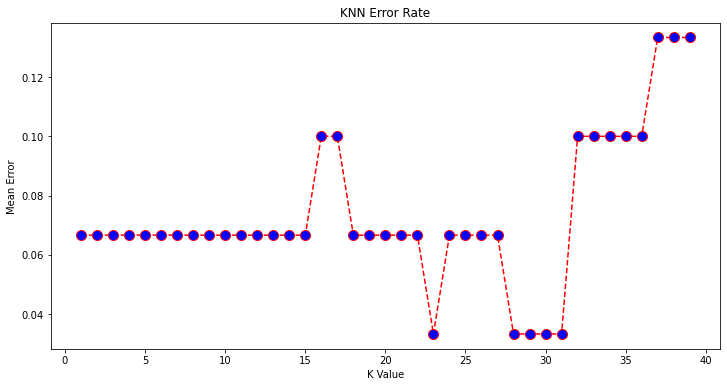

In [46]:
plt.figure(figsize=(12,6))

plt.plot(range(1, 40), error, color='red', linestyle='dashed', 
         marker='o', markerfacecolor='blue', markersize=10)

plt.title('KNN Error Rate')
plt.xlabel('K Value')
plt.ylabel('Mean Error')